In [1]:
%pip install h5py
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


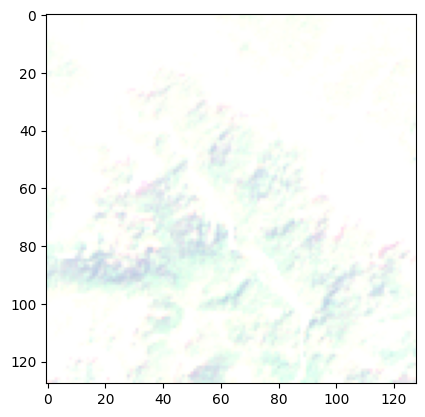

In [114]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import h5py

# for a single image
image = 3500
image_path = "./data/TrainData/img/image_"+str(image)+".h5"
mask_path = "./data/TrainData/mask/mask_"+str(image)+".h5"

Train_x = np.zeros((128,128,6))
Train_y = np.zeros((128,128,1))

with h5py.File(image_path, 'r') as hdf:
    data_image = np.array(hdf.get('img'))
    data_image[np.isnan(data_image)] = 0.0000001

    data_red = data_image[:,:,3]  #red band
    data_nir = data_image[:,:,7]  #near infrared band
    data_ndvi = np.divide((data_nir - data_red),np.add(data_nir, data_red)) #calculating ndvi

    Train_x[:,:,0] = data_red             #red band 
    Train_x[:,:,1] = data_image[:,:,2]    #green band
    Train_x[:,:,2] = data_image[:,:,1]    #blue band
    Train_x[:,:,3] = data_ndvi            #ndvi band
    Train_x[:,:,4] = data_image[:,:,12]   #slope band
    Train_x[:,:,5] = data_image[:,:,13]   #elevation band
    plt.imshow(Train_x[:,:,0:3])
    plt.show()
    

    
    

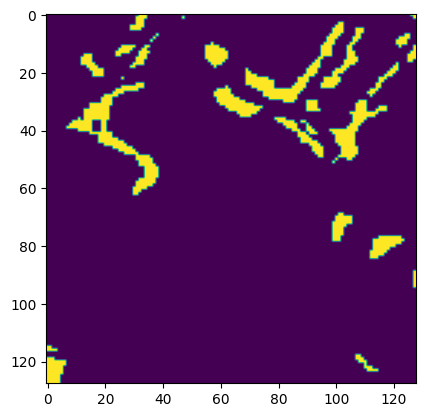

In [115]:
try:
    with h5py.File(mask_path, 'r') as hdf:
        data_mask = np.array(hdf.get('mask'))
        data_mask[np.isnan(data_mask)] = 0.0000001
        Train_y[:,:,0] = data_mask
        plt.imshow(Train_y)
        plt.show()
        
except Exception as e:
        print("Error:", str(e))

In [116]:
x_train = np.reshape(Train_x,(Train_x.shape[0]*Train_x.shape[1], Train_x.shape[2]))
y_train = np.reshape(Train_y,(Train_y.shape[0]*Train_y.shape[1], Train_y.shape[2]))


In [117]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [118]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=42, verbose=3, n_jobs=-1, criterion='gini', bootstrap= True)
rfc.fit(x_train, y_train)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


C:\Users\anurag\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42, verbose=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


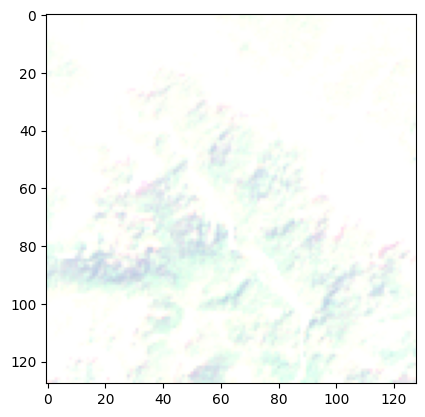

In [119]:
# Testing images

image = 2145
image_path = "./data/TrainData/img/image_"+str(image)+".h5"
mask_path = "./data/TrainData/mask/mask_"+str(image)+".h5"


Test_x = np.zeros((128,128,6))
Test_y = np.zeros((128,128,1))

with h5py.File(image_path, 'r') as hdf:
    data_image = np.array(hdf.get('img'))
    data_image[np.isnan(data_image)] = 0.0000001

    data_red = data_image[:,:,3]  #red band
    data_nir = data_image[:,:,7]  #near infrared band
    data_ndvi = np.divide((data_nir - data_red),np.add(data_nir, data_red)) #calculating ndvi

    Test_x[:,:,0] = data_red             #red band 
    Test_x[:,:,1] = data_image[:,:,2]    #green band
    Test_x[:,:,2] = data_image[:,:,1]    #blue band
    Test_x[:,:,3] = data_ndvi            #ndvi band
    Test_x[:,:,4] = data_image[:,:,12]   #slope band
    Test_x[:,:,5] = data_image[:,:,13]   #elevation band
    plt.imshow(Train_x[:,:,0:3])
    plt.show()
    



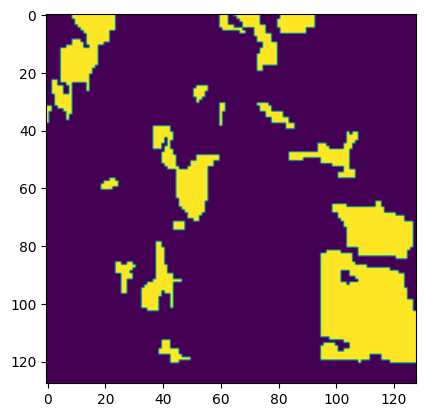

In [120]:
try:
    with h5py.File(mask_path, 'r') as hdf:
        data_mask = np.array(hdf.get('mask'))
        data_mask[np.isnan(data_mask)] = 0.0000001
        Test_y[:,:,0] = data_mask
        plt.imshow(Test_y)
        plt.show()
        
except Exception as e:
        print("Error:", str(e))

In [121]:
x_test = np.reshape(Test_x,(Test_x.shape[0]*Test_x.shape[1], Test_x.shape[2]))
y_test = np.reshape(Test_y,(Test_y.shape[0]*Test_y.shape[1], Test_y.shape[2]))


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


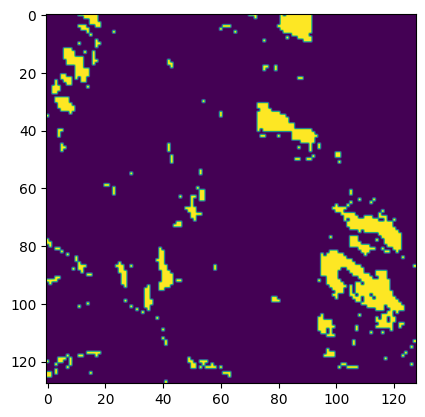

In [122]:
y_pred = rfc.predict(x_test)
image_predicted = np.reshape(y_pred, (128,128)) 
plt.imshow(image_predicted)

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     13683
         1.0       0.78      0.34      0.47      2701

    accuracy                           0.88     16384
   macro avg       0.83      0.66      0.70     16384
weighted avg       0.87      0.88      0.85     16384

